In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

% matplotlib inline

In [2]:
# Load data
train_df = pd.read_csv("~/real_estate/data/train_df_smote.csv")
test_df = pd.read_csv("~/real_estate/data/supervised_dfs/test_df_pca.csv")

# Split daga
features = train_df.columns[:-1]

X_train = train_df[features].values
X_test = test_df[features].values
y_train = train_df["target"].values
y_test = test_df["target"].values

In [12]:
# Run regression
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
# Get predictions and errors
y_train_hat = reg.predict(X_train)
y_test_hat = reg.predict(X_test)

errors_train = abs(y_train_hat - y_train)
errors_test = abs(y_test_hat - y_test)

print("Mean test error: ", np.mean(errors_test))
print("Mean test value: ", np.mean(y_test))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat)[0,1]))
print('---')
print("Mean train error: ", np.mean(errors_train))
print("Mean train value: ", np.mean(y_train))
print("R^2 train: ", np.square(np.corrcoef(y_train, y_train_hat)[0,1]))

Mean test error:  0.037812887760786076
Mean test value:  0.011548391038586212
R^2 test:  0.017723334750428005
---
Mean train error:  0.003273939253073578
Mean train value:  0.10820680521390952
R^2 train:  0.997987298761562


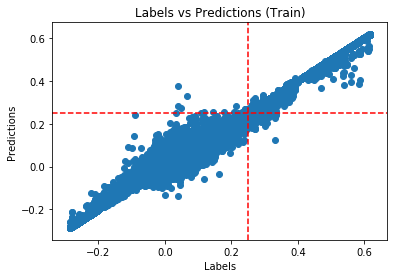

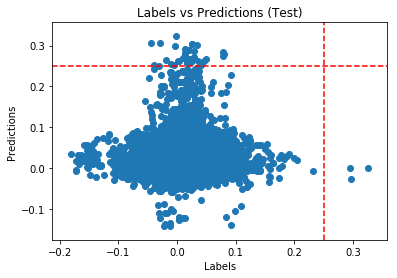

In [24]:
plt.scatter(y_train, y_train_hat)
plt.title("Labels vs Predictions (Train)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

plt.scatter(y_test, y_test_hat)
plt.title("Labels vs Predictions (Test)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()